In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)
np.set_printoptions(precision=2)

In [4]:
def my_softmax(z):
    """
    Softmax converts a vector of values to o probability distribution.
    
    Args:
      z (ndarray (N,))  : input data, N features
      
    Returns:
      a (ndarray (N,))  : softmax of z
    """

    length = len(z)
    a = np.zeros(len(z))
    total_exp_z = 0 

    for data in z:
        total_exp_z += np.exp(data)

    for data in range(length):
        a[data] = np.exp(z[data]) / total_exp_z

    return a

In [5]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)

print("my_softmax:", a)
print("tensorflow softmax(z):", atf)

my_softmax: [0.03 0.09 0.24 0.64]
tensorflow softmax(z): tf.Tensor([0.03 0.09 0.24 0.64], shape=(4,), dtype=float64)


In [6]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [7]:
print("First element of X:", X[0])
print("Shape of X:", X.shape)

First element of X: [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-01  2.78e

In [8]:
print("First element of y:", y[0])
print("Last element of y", y[-1])
print("Shape of y", y.shape)

First element of y: [0]
Last element of y [9]
Shape of y (5000, 1)


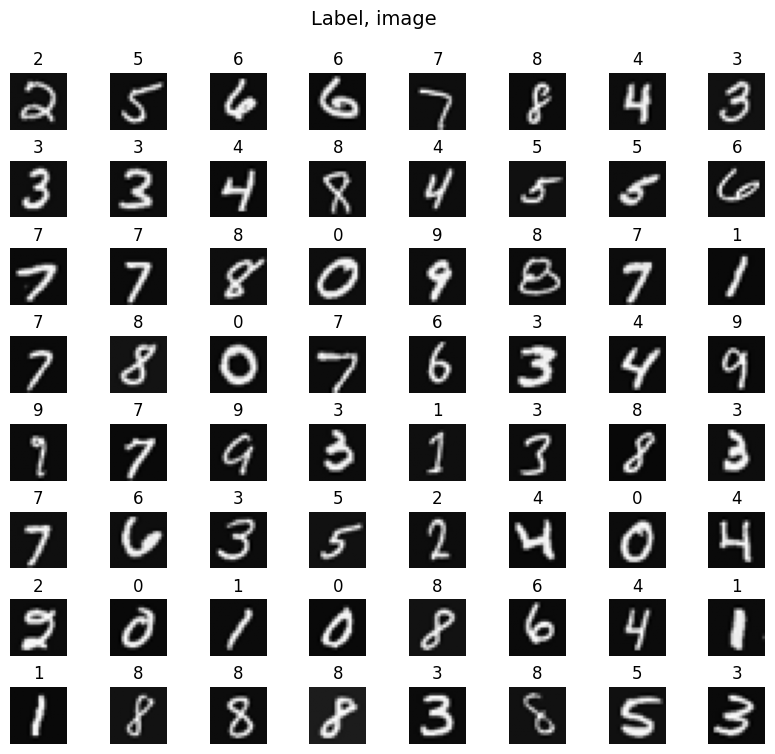

In [10]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_shaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_shaped, cmap='gray')

    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14) 

In [17]:
model = Sequential([
    tf.keras.layers.Input(shape=(400,)),
    Dense(25, activation=relu),
    Dense(15, activation=relu),
    Dense(10, activation=linear)
], name= "my_model"
)

In [18]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                10025     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [19]:
[layer1, layer2, layer3] = model.layers

In [20]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f'W1 shape: {W1.shape} b1 shape: {b1.shape}')
print(f'W2 shape: {W2.shape} b2 shape: {b2.shape}')
print(f'W3 shape: {W3.shape} b3 shape: {b3.shape}')

W1 shape: (400, 25) b1 shape: (25,)
W2 shape: (25, 15) b2 shape: (15,)
W3 shape: (15, 10) b3 shape: (10,)


In [21]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)
model.fit(X, y, epochs=40)

Epoch 1/40
157/157 [==============================] - 3s 2ms/step - loss: 1.6168
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.6761
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4499
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3702
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3195
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2864
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2592
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2358
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2182
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2051
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1869
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1703
Epoch 13/40
157/157 [====

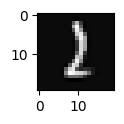

1/1 [==============================] - 0s 15ms/step
Predicting a Two:
 [[-16.3   -2.38   1.28  -2.73 -14.66 -11.43  -7.06  -1.25  -8.54 -13.79]]
Largest Prediction Index 2


In [28]:
image_of_two = X[1015]
fig = plt.figure(figsize=(1,1))
plt.imshow(image_of_two.reshape((20,20)).T, cmap='gray')
plt.show()

prediction = model.predict(image_of_two.reshape(1,400))
print("Predicting a Two:\n", prediction)
print("Largest Prediction Index", np.argmax(prediction))

In [29]:
prediction_p = tf.nn.softmax(prediction)

print("Predicting a two probability vector:\n", prediction_p)
print("Total of prediction: ", np.sum(prediction_p))

Predicting a two probability vector:
 tf.Tensor(
[[2.05e-08 2.29e-02 8.90e-01 1.60e-02 1.06e-07 2.68e-06 2.13e-04 7.07e-02
  4.84e-05 2.52e-07]], shape=(1, 10), dtype=float32)
Total of prediction:  1.0000001


1/1 [==============================] - 0s 13ms/step


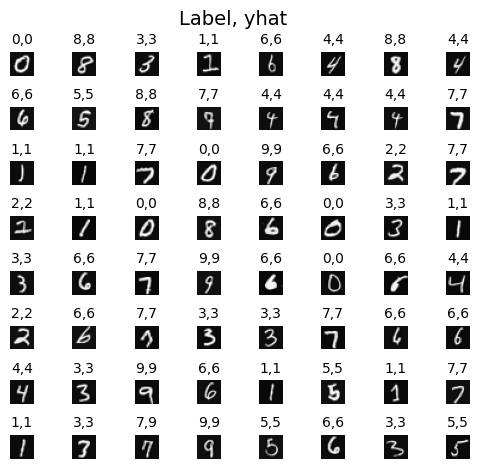

In [32]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    ax.set_title(f'{y[random_index, 0]},{yhat}', fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 13ms/step


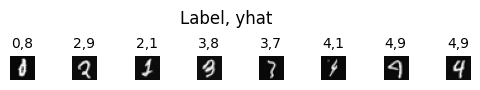

In [34]:
# Display Errors
f = model.predict(X)
yhat = np.argmax(f, axis=1)
doo = yhat != y[:,0]
idxs = np.where(yhat != y[:,0])[0]
if len(idxs) == 0:
    print("no errors found")
else:
    cnt = min(8, len(idxs))
    fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
    fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]

    for i in range(cnt):
        j = idxs[i]
        X_reshaped = X[j].reshape((20,20)).T

        # Display the image
        ax[i].imshow(X_reshaped, cmap='gray')

        # Predict using the Neural Network
        prediction = model.predict(X[j].reshape(1,400))
        prediction_p = tf.nn.softmax(prediction)
        yhat = np.argmax(prediction_p)

        # Display the label above the image
        ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
        ax[i].set_axis_off()
        fig.suptitle("Label, yhat", fontsize=12)